# Call center data modeling

In [1]:
# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# load call center data set
waiting_times_day = np.loadtxt('call_center.csv')

In [3]:
# data pre-processing
current_time = 0
waiting_times_per_hour = [[] for _ in range(24)]  # Make 24 empty lists, one per hour
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    print('%02i:00-%02i:00 - %i calls' % (hour, hour + 1, len(waiting_times_hour)))

00:00-01:00 - 7 calls
01:00-02:00 - 5 calls
02:00-03:00 - 8 calls
03:00-04:00 - 7 calls
04:00-05:00 - 21 calls
05:00-06:00 - 42 calls
06:00-07:00 - 96 calls
07:00-08:00 - 189 calls
08:00-09:00 - 274 calls
09:00-10:00 - 344 calls
10:00-11:00 - 487 calls
11:00-12:00 - 892 calls
12:00-13:00 - 869 calls
13:00-14:00 - 401 calls
14:00-15:00 - 206 calls
15:00-16:00 - 169 calls
16:00-17:00 - 261 calls
17:00-18:00 - 430 calls
18:00-19:00 - 579 calls
19:00-20:00 - 383 calls
20:00-21:00 - 136 calls
21:00-22:00 - 45 calls
22:00-23:00 - 28 calls
23:00-24:00 - 12 calls


In [18]:
alpha_per_hour = []
beta_per_hour = []
posterior_per_hour = []

for hour, waiting_times_hour in enumerate(waiting_times_per_hour):
    
    # set prior hyperparameters
    alpha_0 = 1
    beta_0 = 0.25
    
    # calculate posterior hyperparameters
    alpha = alpha_0 + len(waiting_times_hour)
    beta = beta_0 + sum(waiting_times_hour)
    print("Posterior for hour {:d} is: α = {:.2f}, β = {:.2f}".format(hour, alpha, beta))
    
    # create posterior distribution
    posterior = stats.gamma(a=alpha, scale=1/beta)
    print ("95% confidence interval over λ: [{:.2f}, {:.2f}]".format(posterior.ppf(0.025), posterior.ppf(0.975)))
    print ("mean of λ: {:.2f}".format(posterior.mean()))
    # add data to set
    alpha_per_hour.append(alpha)
    beta_per_hour.append(beta)
    posterior_per_hour.append(posterior)

Posterior for hour 0 is: α = 8.00, β = 60.51
95% confidence interval over λ: [0.06, 0.24]
mean of λ: 0.13
Posterior for hour 1 is: α = 6.00, β = 67.87
95% confidence interval over λ: [0.03, 0.17]
mean of λ: 0.09
Posterior for hour 2 is: α = 9.00, β = 69.97
95% confidence interval over λ: [0.06, 0.23]
mean of λ: 0.13
Posterior for hour 3 is: α = 8.00, β = 44.65
95% confidence interval over λ: [0.08, 0.32]
mean of λ: 0.18
Posterior for hour 4 is: α = 22.00, β = 58.83
95% confidence interval over λ: [0.23, 0.55]
mean of λ: 0.37
Posterior for hour 5 is: α = 43.00, β = 60.18
95% confidence interval over λ: [0.52, 0.94]
mean of λ: 0.71
Posterior for hour 6 is: α = 97.00, β = 59.89
95% confidence interval over λ: [1.31, 1.96]
mean of λ: 1.62
Posterior for hour 7 is: α = 190.00, β = 60.18
95% confidence interval over λ: [2.72, 3.62]
mean of λ: 3.16
Posterior for hour 8 is: α = 275.00, β = 60.50
95% confidence interval over λ: [4.02, 5.10]
mean of λ: 4.55
Posterior for hour 9 is: α = 345.00, β 

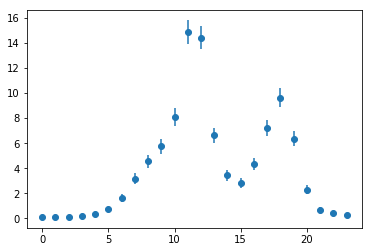

In [22]:
mean_per_hour = [post.mean() for post in posterior_per_hour]
confidence_95_per_hour = [post.mean() - post.ppf(0.025) for post in posterior_per_hour]

plt.errorbar(x=list(range(0, 24)), y=mean_per_hour, yerr=confidence_95_per_hour, fmt='o')
plt.show()